# Python Intermediate - Day 1
---
# Using Pandas
- `pandas` is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool for Python
- `pandas` is built on top of `numpy` and therefore quite often these two are used together.

To import numpy and pands
```
import numpy as np
import pandas as pd
```


In [2]:
import numpy as np
import pandas as pd

# Check your Pandas version
Syntax:
```
print(pd.__version__)
```

In [3]:
print(pd.__version__)

1.4.1


# Some python handy features

**Creating array**

instead of typing `l = ['A', 'B', 'C', 'D', 'E']`
```
l = list('ABCDE') # the list() function would pick a character a time and make it a independant member
l = 'A B C D E'.split() # the default charact to split is SPACE
```

**Generates a range of dates**:
```
dates = pd.date_range('20210101', periods=7) 
type(dates) # returns pandas.core.indexes.datetimes.DatetimeIndex
```

In [4]:
list('ABCDE')

['A', 'B', 'C', 'D', 'E']

In [5]:
'A B C D E'.split()

['A', 'B', 'C', 'D', 'E']

In [6]:
dates = pd.date_range('20220101', periods=7)

In [7]:
dates

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07'],
              dtype='datetime64[ns]', freq='D')

In [8]:
type(dates)

pandas.core.indexes.datetimes.DatetimeIndex

# Shortcuts

Enter COMMAND mode & enter EDIT mode
* `ESC`: enter command mode (while you are in EDIT mode)
* `ENTER`: enter edit mode (while you are in COMMAND mode)



To use other keyboard shortcuts, make sure you are in COMMAND mode

* `SHIFT + ENTER`: Run current cell and move to next cell
* `CMD + ENTER` (Mac) or `CTRL + ENTER` (Windows) to run and stay at the current cell
* `A`: insert new cell above
* `B`: insert new cell below
* `D + D`: delete the current celll
* `SHIFT + TAB`: after you input a code, press this key combination to show helps
* `SHIFT + UP/DOWN`: to select multiple cells
* `SHIFT + CTRL + -`: split current cells into two from where your cursor is 
* `SHIFT + M`: Merge multiple cells
* `. + TAB`: after `.`, press `TAB` for code completion

# 3-Minute Shortcuts Practicing

Picking up a few shortcuts will speed up your coding speed by great deal.  

You have 3 minutes to practice the above mentioned keyboard shortcut.

# Help

Prepend a library, method or variable with ?, you can access the Docstring for quick reference on syntax.

e.g.

```
?print
?str.upper
```

In [127]:
?str.upper

# IPython Magic Commands

To list all the IPython magic commands, type

`%lsmagic`


** A few common magic commands **

* `%pwd`: present working directory
* `%ls`: list the files/folders under current directory

In [129]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

In [140]:
%ls

Day1.ipynb* Day2.ipynb* data/


# Delete a variable from kernel

Use the following command 

`del varaialb_name`

e.g.:

```
greeting = "hello from Sunny"
pring(greeting)
del greeting
pring(greeting) # since greeting is deleted, this line will throw an error

```

# Pandas `DataFrame`
A `DataFrame` is a two dimensional data structure

**To declare a dataframe**:
```
df = pd.DataFrame({
    "Name": ["Andy", "Ben", "Cathy", "Debra"],
    "Age": [20, 22, 23, 22],
    "Sex": ["male", "male", "female", "female"],
    "Year": [1, 3, 4, 3]
})
```

**Check the type**
```
print(type(df)) # it returns pandas.core.frame.DataFrame

```
**In real applications**
- `DataFrame` are seldom declared by like code above.
- Instead, they are imported from external sources, like the following file formats
- E.g.: csv, excel, json

In [13]:
df = pd.DataFrame({
    "Name": ["Andy", "Ben", "Cathy", "Debra", "Eva"],
    "Age": [20, 22, 23, 22, 21],
    "Sex": ["male", "male", "female", "female", "female"],
    "Year": [1, 3, 4, 3, 2]
})

In [14]:
df

,Name,Age,Sex,Year
0,Andy,20,male,1
1,Ben,22,male,3
2,Cathy,23,female,4
3,Debra,22,female,3
4,Eva,21,female,2


In [15]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


# DataFrame information
```
df.shape # return the dimension of data-frame in the form of tuple
df.shape[0] # first elememnt of tuple.  it represent the number of row
df.info() # return the detailed information for a data-frame
df.describe() # shows the basic statistical summary such as min, max, average of numeric column
```

In [16]:
df.shape

(5, 4)

In [17]:
df.shape[0]

5

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    5 non-null      object
 1   Age     5 non-null      int64 
 2   Sex     5 non-null      object
 3   Year    5 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 288.0+ bytes


In [20]:
df.describe()

,Age,Year
count,5.000000,5.000000
mean,21.600000,2.600000
std,1.140175,1.140175
min,20.000000,1.000000
25%,21.000000,2.000000
50%,22.000000,3.000000
75%,22.000000,3.000000
max,23.000000,4.000000


# Retrieving a column (in the form of Pandas Series)
Specify a **column name** (in string) to indicate which column you want to retrieve

Example
```
df['Name']
name = df['Name']
print(type(name)) # returns pandas.core.series.Series
```

A Pandas Series is like a column in a table.

It is a one-dimensional array holding data of any type.

In [23]:
df['Name']
name = df['Name']
name

0     Andy
1      Ben
2    Cathy
3    Debra
4      Eva
Name: Name, dtype: object

In [24]:
print(type(name)) # returns pandas.core.series.Series

<class 'pandas.core.series.Series'>


# Retrieving multiple columns
Use a `[]` (square bracket) with a column names (in string) to indicate which columns you want to retrieve

**Example**
```
columns = ['Name', 'Year'] # declare the columns you want in a list
print(df[columns]) # pass the column list as paramenter to the dataframe
print(type(df[columns])) # Returns pandas.core.frame.DataFrame
```
A quick hand to write the above code is using double square brackets
```
name_and_year = df[['Name', 'Year']] # doubled square bracket are used here
print(type(name_and_year)) # Returns pandas.core.frame.DataFrame
```
**Below is a mistake**
```
name_and_year = df['Name', 'Year']
```

In [27]:
columns = ['Name', 'Year'] # declare the columns you want in a list
print(df[columns]) # pass the column list as paramenter to the dataframe
print(type(df[columns])) # Returns pandas.core.frame.DataFrame

    Name  Year
0   Andy     1
1    Ben     3
2  Cathy     4
3  Debra     3
4    Eva     2
<class 'pandas.core.frame.DataFrame'>


In [28]:
df[['Name', 'Year']] 
name_and_year = df[['Name', 'Year']]
print(name_and_year)

    Name  Year
0   Andy     1
1    Ben     3
2  Cathy     4
3  Debra     3
4    Eva     2


In [29]:
print(type(name_and_year))

<class 'pandas.core.frame.DataFrame'>


# Use `loc[]` to locate a row
Pandas use the `loc` attribute to return one or more specified row(s)

Example:
```
df.loc[0]
df.loc[1]
type(df.loc[0]) # returns pandas.core.series.Series
```

In [30]:
df.loc[0]

Name    Andy
Age       20
Sex     male
Year       1
Name: 0, dtype: object

In [29]:
df.loc[1]

Name     Ben
Age       22
Sex     male
Year       3
Name: 1, dtype: object

In [31]:
type(df.loc[0]) # returns pandas.core.series.Series

pandas.core.series.Series

In [33]:
df.loc[[0,2,4]]

,Name,Age,Sex,Year
0,Andy,20,male,1
2,Cathy,23,female,4
4,Eva,21,female,2


In [32]:
type(df.loc[[0,2,4]])

pandas.core.frame.DataFrame

# Locating Multiple Rows
Provide a list of row number: `[0, 2]`

**Example**:
```
rows = [0, 2] # defines a list of rows number
df.loc[rows] # use the defined row numbers as parameter for loc[]
```

**Or simplified one liner**:
```
df.loc[[0, 2]]
type(df.loc[[0, 2]])
```

**Below is a mistake**
```
df.loc[0, 2] # only one pair of squar brackets
```


In [36]:
df.loc[[0, 2]]

,Name,Age,Sex,Year
0,Andy,20,male,1
2,Cathy,23,female,4


In [35]:
type(df.loc[[0, 2]])

pandas.core.frame.DataFrame

## Retrieving a range of row
- Provide the starting row number and ending row number. 
- Use `:` to separate the starting row number and ending row number

Example:
```
df.loc[0:2] # selecting from position 0 to 2 (inclusive)
df.loc[:2] # omitting the starting index. selecting from position 0 to 2 
df.loc[2:] # omitting the ending index. selecting from position 2 all the way to the end
```
Short hand (works a bit different. It's exclusive. The end index is NOT included in the result)
```
df[0:2]
df[:2] # from position 0 to 1. End position exclusive.
df[2:] # from position 2 to the end
```


In [40]:
df.loc[0:2]

,Name,Age,Sex,Year
0,Andy,20,male,1
1,Ben,22,male,3
2,Cathy,23,female,4


In [41]:
df[0:2]

,Name,Age,Sex,Year
0,Andy,20,male,1
1,Ben,22,male,3


In [43]:
type(df[0:2])

pandas.core.frame.DataFrame

In [48]:
df.loc[:2]

,Name,Age,Sex,Year
0,Andy,20,male,1
1,Ben,22,male,3
2,Cathy,23,female,4


In [47]:
df[:2]

,Name,Age,Sex,Year
0,Andy,20,male,1
1,Ben,22,male,3


In [45]:
df.loc[2:]

,Name,Age,Sex,Year
2,Cathy,23,female,4
3,Debra,22,female,3
4,Eva,21,female,2


In [46]:
df[2:]

,Name,Age,Sex,Year
2,Cathy,23,female,4
3,Debra,22,female,3
4,Eva,21,female,2


# Filtering Rows
- It scans through each row
- Perform a comparison operation on a column of each row 
- It returns `True` or `False` as result for the comparison operation on that row

Example:
```
filter = df['Age']<23 # this returns a Series of True/False
print(filter)
type(filter) # It a Series of True/False
df[filter] # use the filter as parameters. A True means that row will stay.  A False means that row will be kicked out.
```

One-liner manner
```
df[df['Age']<23]
```


In [49]:
filter = df['Age']<23

In [51]:
print(filter)
type(filter)

0     True
1     True
2    False
3     True
4     True
Name: Age, dtype: bool


pandas.core.series.Series

In [52]:
type(filter)

pandas.core.series.Series

In [54]:
df[filter]

,Name,Age,Sex,Year
0,Andy,20,male,1
1,Ben,22,male,3
3,Debra,22,female,3
4,Eva,21,female,2


# Filtering Rows with multiple condition (multiple filters)
Example:
```
filter = df['Age']<23
filter2 = df['Year']==3
df[filter & filter2] # &: AND logical operator
df[filter | filter2] # |: OR logical operator
```

Or one-liner
```
df[(df['Age']<23) & (df['Year']==3)] # make sure you include the a pair of () for each logical operation
df[(df['Age']<23) | (df['Year']==3)] # make sure you include the a pair of () for each logical operation
```

In [55]:
filter = df['Age']<23
filter

0     True
1     True
2    False
3     True
4     True
Name: Age, dtype: bool

In [56]:
filter2 = df['Year']==3
filter2

0    False
1     True
2    False
3     True
4    False
Name: Year, dtype: bool

In [57]:
df[filter & filter2]

,Name,Age,Sex,Year
1,Ben,22,male,3
3,Debra,22,female,3


In [58]:
df[filter | filter2]

,Name,Age,Sex,Year
0,Andy,20,male,1
1,Ben,22,male,3
3,Debra,22,female,3
4,Eva,21,female,2


In [59]:
df[(df['Age']<23) & (df['Year']==3)]

,Name,Age,Sex,Year
1,Ben,22,male,3
3,Debra,22,female,3


In [60]:
df[(df['Age']<23) | (df['Year']==3)]

,Name,Age,Sex,Year
0,Andy,20,male,1
1,Ben,22,male,3
3,Debra,22,female,3
4,Eva,21,female,2


You can use `concat()` function to merge multiple Series to form a data-frame
the filter result for easier studying the logical operations
```
pd.concat([filter, filter2, (filter & filter2)], axis=1)
pd.concat([filter, filter2, (filter | filter2)], axis=1)

```

In [63]:
print(type(filter))
print(type(filter2))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [64]:
pd.concat([filter, filter2, (filter & filter2)], axis=1)

,Age,Year,0
0,True,False,False
1,True,True,True
2,False,False,False
3,True,True,True
4,True,False,False


In [65]:
type(pd.concat([filter, filter2, (filter & filter2)], axis=1))

pandas.core.frame.DataFrame

In [66]:
pd.concat([filter, filter2, (filter | filter2)], axis=1)

,Age,Year,0
0,True,False,True
1,True,True,True
2,False,False,False
3,True,True,True
4,True,False,True


# Restricting rows and columns at the same time
You can apply both row filtering and columns retricting at the same time

Example:
```
df[df['Year']==3]
df[df['Year']==3][['Name', 'Year']] # It might become harder to read
```

In [67]:
df[df['Year']==3]

,Name,Age,Sex,Year
1,Ben,22,male,3
3,Debra,22,female,3


In [68]:
df[df['Year']==3][['Name', 'Year']]

,Name,Year
1,Ben,3
3,Debra,3


# Reading External Data Source
Code example:
```
df = pd.read_csv('./data/allowance.csv') # the dot "./" mean relative path
df.head() # return the first 5 rows
df.tail() # return the last 5 rows
df.head(8)
df.tail(8)
df.info() # the table meta data
df.describe() # basic statistic information
```
**Handling Empty Values**:
- The `info()` method also tells us how many Non-Null values there are present in each column
- Empty values, or Null values, can be bad when analyzing data, and you should consider removing rows with empty values or replace the empty value with and average value of the column
- This is a called data tidying.

In [69]:
df = pd.read_csv('./data/allowance.csv')

In [70]:
df.head()

,Assessment_Year,Basic,Married_Person,Child,Child_newborn,Dependent_Brother_Sister,Dependent_Parent_60,Dependent_Parent_55,Additional_Dependent_Parent_60,Additional_Dependent_Parent_55,Personal_Disability_Allowance,Single_Parent,Disabled_Dependant
0,2019/20,132000,264000,120000,120000,37500,50000,25000,50000,25000,75000.0,132000,75000
1,2018/19,132000,264000,120000,120000,37500,50000,25000,50000,25000,75000.0,132000,75000
2,2017/18,132000,264000,100000,100000,37500,46000,23000,46000,23000,NaN,132000,75000
3,2016/17,132000,264000,100000,100000,33000,46000,23000,46000,23000,NaN,132000,66000
4,2015/16,120000,240000,100000,100000,33000,40000,20000,40000,20000,NaN,120000,66000


In [71]:
df.tail()

,Assessment_Year,Basic,Married_Person,Child,Child_newborn,Dependent_Brother_Sister,Dependent_Parent_60,Dependent_Parent_55,Additional_Dependent_Parent_60,Additional_Dependent_Parent_55,Personal_Disability_Allowance,Single_Parent,Disabled_Dependant
6,2013/14,120000,240000,70000,70000,33000,38000,19000,38000,19000,NaN,120000,66000
7,2012/13,120000,240000,63000,63000,33000,38000,19000,38000,19000,NaN,120000,66000
8,2011/12,108000,216000,60000,60000,30000,36000,18000,36000,18000,NaN,108000,60000
9,2010/11,108000,216000,50000,50000,30000,30000,15000,30000,15000,NaN,108000,60000
10,2009/10,108000,216000,50000,50000,30000,30000,15000,30000,15000,NaN,108000,60000


In [72]:
df.head(8)

,Assessment_Year,Basic,Married_Person,Child,Child_newborn,Dependent_Brother_Sister,Dependent_Parent_60,Dependent_Parent_55,Additional_Dependent_Parent_60,Additional_Dependent_Parent_55,Personal_Disability_Allowance,Single_Parent,Disabled_Dependant
0,2019/20,132000,264000,120000,120000,37500,50000,25000,50000,25000,75000.0,132000,75000
1,2018/19,132000,264000,120000,120000,37500,50000,25000,50000,25000,75000.0,132000,75000
2,2017/18,132000,264000,100000,100000,37500,46000,23000,46000,23000,NaN,132000,75000
3,2016/17,132000,264000,100000,100000,33000,46000,23000,46000,23000,NaN,132000,66000
4,2015/16,120000,240000,100000,100000,33000,40000,20000,40000,20000,NaN,120000,66000
5,2014/15,120000,240000,70000,70000,33000,40000,20000,40000,20000,NaN,120000,66000
6,2013/14,120000,240000,70000,70000,33000,38000,19000,38000,19000,NaN,120000,66000
7,2012/13,120000,240000,63000,63000,33000,38000,19000,38000,19000,NaN,120000,66000


In [73]:
df.info() # the table meta data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Assessment_Year                 11 non-null     object 
 1   Basic                           11 non-null     int64  
 2   Married_Person                  11 non-null     int64  
 3   Child                           11 non-null     int64  
 4   Child_newborn                   11 non-null     int64  
 5   Dependent_Brother_Sister        11 non-null     int64  
 6   Dependent_Parent_60             11 non-null     int64  
 7   Dependent_Parent_55             11 non-null     int64  
 8   Additional_Dependent_Parent_60  11 non-null     int64  
 9   Additional_Dependent_Parent_55  11 non-null     int64  
 10  Personal_Disability_Allowance   2 non-null      float64
 11  Single_Parent                   11 non-null     int64  
 12  Disabled_Dependant              11 non

In [74]:
df.describe() # basic statistic information

,Basic,Married_Person,Child,Child_newborn,Dependent_Brother_Sister,Dependent_Parent_60,Dependent_Parent_55,Additional_Dependent_Parent_60,Additional_Dependent_Parent_55,Personal_Disability_Allowance,Single_Parent,Disabled_Dependant
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,2.0,11.000000,11.000000
mean,121090.909091,242181.818182,82090.909091,82090.909091,33409.090909,40363.636364,20181.818182,40363.636364,20181.818182,75000.0,121090.909091,66818.181818
std,9974.512975,19949.025950,26534.711400,26534.711400,2931.025263,7032.392584,3516.196292,7032.392584,3516.196292,0.0,9974.512975,5862.050526
min,108000.000000,216000.000000,50000.000000,50000.000000,30000.000000,30000.000000,15000.000000,30000.000000,15000.000000,75000.0,108000.000000,60000.000000
25%,114000.000000,228000.000000,61500.000000,61500.000000,31500.000000,37000.000000,18500.000000,37000.000000,18500.000000,75000.0,114000.000000,63000.000000
50%,120000.000000,240000.000000,70000.000000,70000.000000,33000.000000,40000.000000,20000.000000,40000.000000,20000.000000,75000.0,120000.000000,66000.000000
75%,132000.000000,264000.000000,100000.000000,100000.000000,35250.000000,46000.000000,23000.000000,46000.000000,23000.000000,75000.0,132000.000000,70500.000000
max,132000.000000,264000.000000,120000.000000,120000.000000,37500.000000,50000.000000,25000.000000,50000.000000,25000.000000,75000.0,132000.000000,75000.000000


# Tidying Data
Fixing bad data in your data set.

**Bad data could be**:
- Empty cells
- Data in wrong format
- Wrong data
- Duplicates

### Dropping Columns
You might like to drop a few columns that you don't need
```
new_df = df.drop(columns=['Personal_Disability_Allowance', 'Disabled_Dependant'])
df.info()
new_df.info()
```

In [75]:
new_df = df.drop(columns=['Personal_Disability_Allowance', 'Disabled_Dependant'])

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Assessment_Year                 11 non-null     object 
 1   Basic                           11 non-null     int64  
 2   Married_Person                  11 non-null     int64  
 3   Child                           11 non-null     int64  
 4   Child_newborn                   11 non-null     int64  
 5   Dependent_Brother_Sister        11 non-null     int64  
 6   Dependent_Parent_60             11 non-null     int64  
 7   Dependent_Parent_55             11 non-null     int64  
 8   Additional_Dependent_Parent_60  11 non-null     int64  
 9   Additional_Dependent_Parent_55  11 non-null     int64  
 10  Personal_Disability_Allowance   2 non-null      float64
 11  Single_Parent                   11 non-null     int64  
 12  Disabled_Dependant              11 non

In [77]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Assessment_Year                 11 non-null     object
 1   Basic                           11 non-null     int64 
 2   Married_Person                  11 non-null     int64 
 3   Child                           11 non-null     int64 
 4   Child_newborn                   11 non-null     int64 
 5   Dependent_Brother_Sister        11 non-null     int64 
 6   Dependent_Parent_60             11 non-null     int64 
 7   Dependent_Parent_55             11 non-null     int64 
 8   Additional_Dependent_Parent_60  11 non-null     int64 
 9   Additional_Dependent_Parent_55  11 non-null     int64 
 10  Single_Parent                   11 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 1.1+ KB


### Drop Rows with Empty Values
```
cleaned_df = df.dropna() # 9 rows with null value will be dropped
print(df.shape[0])
print(cleaned_df.shape[0])
cleaned_df
cleaned_df.info()
cleaned_df.describe()
```

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Assessment_Year                 11 non-null     object 
 1   Basic                           11 non-null     int64  
 2   Married_Person                  11 non-null     int64  
 3   Child                           11 non-null     int64  
 4   Child_newborn                   11 non-null     int64  
 5   Dependent_Brother_Sister        11 non-null     int64  
 6   Dependent_Parent_60             11 non-null     int64  
 7   Dependent_Parent_55             11 non-null     int64  
 8   Additional_Dependent_Parent_60  11 non-null     int64  
 9   Additional_Dependent_Parent_55  11 non-null     int64  
 10  Personal_Disability_Allowance   2 non-null      float64
 11  Single_Parent                   11 non-null     int64  
 12  Disabled_Dependant              11 non

In [78]:
cleaned_df = df.dropna()

In [84]:
print(df.shape[0])

11


In [80]:
print(cleaned_df.shape[0])

2


In [81]:
cleaned_df

,Assessment_Year,Basic,Married_Person,Child,Child_newborn,Dependent_Brother_Sister,Dependent_Parent_60,Dependent_Parent_55,Additional_Dependent_Parent_60,Additional_Dependent_Parent_55,Personal_Disability_Allowance,Single_Parent,Disabled_Dependant
0,2019/20,132000,264000,120000,120000,37500,50000,25000,50000,25000,75000.0,132000,75000
1,2018/19,132000,264000,120000,120000,37500,50000,25000,50000,25000,75000.0,132000,75000


In [85]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 1
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Assessment_Year                 2 non-null      object 
 1   Basic                           2 non-null      int64  
 2   Married_Person                  2 non-null      int64  
 3   Child                           2 non-null      int64  
 4   Child_newborn                   2 non-null      int64  
 5   Dependent_Brother_Sister        2 non-null      int64  
 6   Dependent_Parent_60             2 non-null      int64  
 7   Dependent_Parent_55             2 non-null      int64  
 8   Additional_Dependent_Parent_60  2 non-null      int64  
 9   Additional_Dependent_Parent_55  2 non-null      int64  
 10  Personal_Disability_Allowance   2 non-null      float64
 11  Single_Parent                   2 non-null      int64  
 12  Disabled_Dependant              2 non-nu

In [86]:
cleaned_df.describe()

,Basic,Married_Person,Child,Child_newborn,Dependent_Brother_Sister,Dependent_Parent_60,Dependent_Parent_55,Additional_Dependent_Parent_60,Additional_Dependent_Parent_55,Personal_Disability_Allowance,Single_Parent,Disabled_Dependant
count,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
mean,132000.0,264000.0,120000.0,120000.0,37500.0,50000.0,25000.0,50000.0,25000.0,75000.0,132000.0,75000.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,132000.0,264000.0,120000.0,120000.0,37500.0,50000.0,25000.0,50000.0,25000.0,75000.0,132000.0,75000.0
25%,132000.0,264000.0,120000.0,120000.0,37500.0,50000.0,25000.0,50000.0,25000.0,75000.0,132000.0,75000.0
50%,132000.0,264000.0,120000.0,120000.0,37500.0,50000.0,25000.0,50000.0,25000.0,75000.0,132000.0,75000.0
75%,132000.0,264000.0,120000.0,120000.0,37500.0,50000.0,25000.0,50000.0,25000.0,75000.0,132000.0,75000.0
max,132000.0,264000.0,120000.0,120000.0,37500.0,50000.0,25000.0,50000.0,25000.0,75000.0,132000.0,75000.0


### Replacing empty cells with mean or median

```
df["Personal_Disability_Allowance"].describe()
x = df["Personal_Disability_Allowance"].mean()
df["Personal_Disability_Allowance"].fillna(x, inplace = True)
df["Personal_Disability_Allowance"].describe()
```


In [87]:
x = df["Personal_Disability_Allowance"].mean()
x

75000.0

In [88]:
df["Personal_Disability_Allowance"].fillna(x, inplace = True)

In [89]:
df["Personal_Disability_Allowance"].describe()

count       11.0
mean     75000.0
std          0.0
min      75000.0
25%      75000.0
50%      75000.0
75%      75000.0
max      75000.0
Name: Personal_Disability_Allowance, dtype: float64

In [90]:
df

,Assessment_Year,Basic,Married_Person,Child,Child_newborn,Dependent_Brother_Sister,Dependent_Parent_60,Dependent_Parent_55,Additional_Dependent_Parent_60,Additional_Dependent_Parent_55,Personal_Disability_Allowance,Single_Parent,Disabled_Dependant
0,2019/20,132000,264000,120000,120000,37500,50000,25000,50000,25000,75000.0,132000,75000
1,2018/19,132000,264000,120000,120000,37500,50000,25000,50000,25000,75000.0,132000,75000
2,2017/18,132000,264000,100000,100000,37500,46000,23000,46000,23000,75000.0,132000,75000
3,2016/17,132000,264000,100000,100000,33000,46000,23000,46000,23000,75000.0,132000,66000
4,2015/16,120000,240000,100000,100000,33000,40000,20000,40000,20000,75000.0,120000,66000
5,2014/15,120000,240000,70000,70000,33000,40000,20000,40000,20000,75000.0,120000,66000
6,2013/14,120000,240000,70000,70000,33000,38000,19000,38000,19000,75000.0,120000,66000
7,2012/13,120000,240000,63000,63000,33000,38000,19000,38000,19000,75000.0,120000,66000
8,2011/12,108000,216000,60000,60000,30000,36000,18000,36000,18000,75000.0,108000,60000
9,2010/11,108000,216000,50000,50000,30000,30000,15000,30000,15000,75000.0,108000,60000


# Finding Relationship
The `corr()` method calculates the relationship between each column in your data set.
```
df.corr()
```
The Result of the `corr()` method is a table with a lot of numbers that represents how well the relationship is between two columns.
- The number varies from `-1` to `1`.
- `1` means that there is a 1 to 1 relationship (a perfect correlation).
- `0.9` is also a good relationship, and if you increase one value, the other will probably increase as well.
- `-0.9` would be just as good relationship as 0.9, but if you increase one value, the other will go down.
- `0.2` means NOT a good relationship, meaning that if one value goes up does not mean that the other will.

Example:
```
df = pd.read_excel('./data/Students.xlsx', sheet_name=0)
df
df.corr()
```

In [91]:
df = pd.read_excel('./data/Students.xlsx', sheet_name=0)
df

,AcademicYear,AssociateDegree,HigherDiploma,Subdegree,FirstYearFirstDegree,TopUpDegree,Undergraduate
0,2007/08,12029,9882,21911,2468,1731,4199
1,2008/09,11238,9405,20643,3004,2095,5099
2,2009/10,14177,10186,24363,2782,2680,5462
3,2010/11,17646,10715,28361,3193,3334,6527
4,2011/12,16018,9331,25349,3640,4081,7721
5,2012/13,18131,13486,31617,6796,6082,12878
6,2013/14,11715,9751,21466,6128,7349,13477
7,2014/15,10275,9483,19758,7194,10488,17682
8,2015/16,10942,8713,19655,6701,8736,15437
9,2016/17,11127,7884,19011,6153,7635,13788


In [92]:
df.corr()

,AssociateDegree,HigherDiploma,Subdegree,FirstYearFirstDegree,TopUpDegree,Undergraduate
AssociateDegree,1.000000,0.728727,0.956570,-0.315338,-0.460673,-0.410802
HigherDiploma,0.728727,1.000000,0.896701,-0.189895,-0.405373,-0.327808
Subdegree,0.956570,0.896701,1.000000,-0.284658,-0.470321,-0.405070
FirstYearFirstDegree,-0.315338,-0.189895,-0.284658,1.000000,0.945621,0.978879
TopUpDegree,-0.460673,-0.405373,-0.470321,0.945621,1.000000,0.992147
Undergraduate,-0.410802,-0.327808,-0.405070,0.978879,0.992147,1.000000


# Groupby: divide data into groups
```
df = pd.read_csv('./data/graduates.csv')
df.info()
df["LevelOfStudy"].unique() # Display unique values of a column
df["ProgrammeCategory"].unique()

df.groupby('LevelOfStudy')
df.groupby('ProgrammeCategory')
group_by_level = df.groupby('LevelOfStudy')
group_by_category = df.groupby('ProgrammeCategory')
group_by_level.groups # Display groups and rows belongs to that groups

# Those integer numbers in the list are the row number.
group_by_level.first() # gives you a preview of the first few groups
group_by_level.last() # gives you a previous of the last few groups
group_by_level.size() # return the number of row (group size) in each group
group_by_level.get_group("Sub-degree") # get a group by provide the KEY of the group
```

In [143]:
df = pd.read_csv('./data/graduates.csv')

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   AcademicYear       653 non-null    object
 1   LevelOfStudy       653 non-null    object
 2   ProgrammeCategory  653 non-null    object
 3   Sex                653 non-null    object
 4   Headcount          653 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 25.6+ KB


In [145]:
df.head()

,AcademicYear,LevelOfStudy,ProgrammeCategory,Sex,Headcount
0,2009/10,Sub-degree,Arts and Humanities,M,158
1,2009/10,Sub-degree,Arts and Humanities,F,475
2,2009/10,Sub-degree,Business and Management,M,73
3,2009/10,Sub-degree,Business and Management,F,227
4,2009/10,Sub-degree,Education,M,122


In [164]:
df.describe()

,Headcount
count,653.000000
mean,495.434916
std,680.415914
min,1.000000
25%,60.000000
50%,158.000000
75%,703.000000
max,2878.000000


In [165]:
df["LevelOfStudy"].unique()

array(['Sub-degree', 'Undergraduate', 'Taught Postgraduate',
       'Research Postgraduate'], dtype=object)

In [166]:
df["ProgrammeCategory"].unique()

array(['Arts and Humanities', 'Business and Management', 'Education',
       'Engineering and Technology', 'Medicine, Dentistry and Health',
       'Sciences', 'Social Sciences'], dtype=object)

In [167]:
df.groupby('LevelOfStudy')

In [168]:
group_by_level = df.groupby('LevelOfStudy')

In [169]:
group_by_level.groups

{'Research Postgraduate': [42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 429, 430, ...], 'Sub-degree': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 389, 390, ...], 

In [170]:
group_by_category = df.groupby('ProgrammeCategory')
group_by_category

In [171]:
group_by_level.groups # Display groups and rows belongs to that groups

{'Research Postgraduate': [42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 429, 430, ...], 'Sub-degree': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 389, 390, ...], 

In [172]:
for group_key, group_data in group_by_level:
    print(group_key)
    print(group_data.head())

Research Postgraduate
   AcademicYear           LevelOfStudy        ProgrammeCategory Sex  Headcount
42      2009/10  Research Postgraduate      Arts and Humanities   M         82
43      2009/10  Research Postgraduate      Arts and Humanities   F        108
44      2009/10  Research Postgraduate  Business and Management   M         53
45      2009/10  Research Postgraduate  Business and Management   F         77
46      2009/10  Research Postgraduate                Education   M         12
Sub-degree
  AcademicYear LevelOfStudy        ProgrammeCategory Sex  Headcount
0      2009/10   Sub-degree      Arts and Humanities   M        158
1      2009/10   Sub-degree      Arts and Humanities   F        475
2      2009/10   Sub-degree  Business and Management   M         73
3      2009/10   Sub-degree  Business and Management   F        227
4      2009/10   Sub-degree                Education   M        122
Taught Postgraduate
   AcademicYear         LevelOfStudy        ProgrammeCategory Sex

In [173]:
group_by_level.size()

LevelOfStudy
Research Postgraduate    168
Sub-degree               154
Taught Postgraduate      163
Undergraduate            168
dtype: int64

In [175]:
group_by_level.first()

,AcademicYear,ProgrammeCategory,Sex,Headcount
LevelOfStudy,,,,
Research Postgraduate,2009/10,Arts and Humanities,M,82
Sub-degree,2009/10,Arts and Humanities,M,158
Taught Postgraduate,2009/10,Arts and Humanities,M,39
Undergraduate,2009/10,Arts and Humanities,M,659


In [176]:
group_by_level.last()

,AcademicYear,ProgrammeCategory,Sex,Headcount
LevelOfStudy,,,,
Research Postgraduate,2020/21,Social Sciences,F,145
Sub-degree,2020/21,Social Sciences,F,14
Taught Postgraduate,2020/21,Social Sciences,F,146
Undergraduate,2020/21,Social Sciences,F,2164


# Those integer numbers in the list are the row number.

**Group Info**
```
group_by_level.first() # gives you a preview of the first few groups
group_by_level.last() # gives you a previous of the last few groups
group_by_level.size() # return the number of row (group size) in each group
```

**To get a group**
```
group_by_level.get_group("Sub-degree") # get a group by provide the KEY of the group
```


**To loop through the groups**
```
for group_key, group_data in group_by_level:
    print(group_key)
    print(group_data.head())
```

In [180]:
group_by_level.get_group("Sub-degree")

,AcademicYear,LevelOfStudy,ProgrammeCategory,Sex,Headcount
0,2009/10,Sub-degree,Arts and Humanities,M,158
1,2009/10,Sub-degree,Arts and Humanities,F,475
2,2009/10,Sub-degree,Business and Management,M,73
3,2009/10,Sub-degree,Business and Management,F,227
4,2009/10,Sub-degree,Education,M,122
...,...,...,...,...,...
606,2020/21,Sub-degree,Engineering and Technology,F,91
607,2020/21,Sub-degree,Sciences,M,76
608,2020/21,Sub-degree,Sciences,F,62
609,2020/21,Sub-degree,Social Sciences,M,12


In [185]:
group_by_category.get_group("Engineering and Technology")

,AcademicYear,LevelOfStudy,ProgrammeCategory,Sex,Headcount
6,2009/10,Sub-degree,Engineering and Technology,M,507
7,2009/10,Sub-degree,Engineering and Technology,F,505
20,2009/10,Undergraduate,Engineering and Technology,M,2152
21,2009/10,Undergraduate,Engineering and Technology,F,1016
34,2009/10,Taught Postgraduate,Engineering and Technology,M,62
...,...,...,...,...,...
618,2020/21,Undergraduate,Engineering and Technology,F,1228
631,2020/21,Taught Postgraduate,Engineering and Technology,M,76
632,2020/21,Taught Postgraduate,Engineering and Technology,F,70
645,2020/21,Research Postgraduate,Engineering and Technology,M,568


# Group Aggregated Data

An aggregated function returns a single aggregated value for each group.

**Using a column name (Returns as Series)**:
```
group_by_level.Headcount.sum() # summation of each group
group_by_level.Headcount.mean() # mean value of each group
group_by_level.Headcount.max() # max value of each group
group_by_level.Headcount.min() # min value of each group
```

**Using agg() function (Returns as data-frame)**:
```
group_by_level.Headcount.agg(['max', 'min', 'count', 'median', 'mean']) 
```

**Without column (Returns as data-frame)**:

- we don’t actually have to specify a column like Headcout. 
- Without a column, it will perform the aggregation across all of the **numeric** columns

```
group_by_level.agg(np.sum) # summation of each group
group_by_level.agg(np.mean) # mean value of each group
group_by_level.agg(np.max) # max value of each group
group_by_level.agg(np.min) # min value of each group
```


In [186]:
group_by_level.Headcount.sum()

LevelOfStudy
Research Postgraduate     28183
Sub-degree                34531
Taught Postgraduate       23409
Undergraduate            237396
Name: Headcount, dtype: int64

In [187]:
group_by_level.Headcount.max()

LevelOfStudy
Research Postgraduate     588
Sub-degree               1226
Taught Postgraduate      1052
Undergraduate            2878
Name: Headcount, dtype: int64

In [188]:
group_by_level.Headcount.min()

LevelOfStudy
Research Postgraduate     12
Sub-degree                 2
Taught Postgraduate        1
Undergraduate            148
Name: Headcount, dtype: int64

In [189]:
group_by_level.Headcount.mean()

LevelOfStudy
Research Postgraduate     167.755952
Sub-degree                224.227273
Taught Postgraduate       143.613497
Undergraduate            1413.071429
Name: Headcount, dtype: float64

In [190]:
group_by_level.Headcount.agg(['max', 'min', 'count', 'median', 'mean'])

,max,min,count,median,mean
LevelOfStudy,,,,,
Research Postgraduate,588,12,168,132.0,167.755952
Sub-degree,1226,2,154,123.0,224.227273
Taught Postgraduate,1052,1,163,56.0,143.613497
Undergraduate,2878,148,168,1236.0,1413.071429


In [191]:
group_by_level.Headcount.agg(['max', 'min', 'count', 'median', 'mean'])

,max,min,count,median,mean
LevelOfStudy,,,,,
Research Postgraduate,588,12,168,132.0,167.755952
Sub-degree,1226,2,154,123.0,224.227273
Taught Postgraduate,1052,1,163,56.0,143.613497
Undergraduate,2878,148,168,1236.0,1413.071429


In [192]:
group_by_level.agg(np.sum)

,Headcount
LevelOfStudy,
Research Postgraduate,28183
Sub-degree,34531
Taught Postgraduate,23409
Undergraduate,237396


In [143]:
group_by_level.agg(np.mean)

,Headcount
LevelOfStudy,
Research Postgraduate,164.759740
Sub-degree,225.895833
Taught Postgraduate,145.597315
Undergraduate,1396.532468


In [144]:
group_by_level.agg(np.max)

,AcademicYear,ProgrammeCategory,Sex,Headcount
LevelOfStudy,,,,
Research Postgraduate,2019/20,Social Sciences,M,588
Sub-degree,2019/20,Social Sciences,M,1226
Taught Postgraduate,2019/20,Social Sciences,M,1052
Undergraduate,2019/20,Social Sciences,M,2878


In [145]:
group_by_level.agg(np.min)

,AcademicYear,ProgrammeCategory,Sex,Headcount
LevelOfStudy,,,,
Research Postgraduate,2009/10,Arts and Humanities,F,12
Sub-degree,2009/10,Arts and Humanities,F,2
Taught Postgraduate,2009/10,Arts and Humanities,F,1
Undergraduate,2009/10,Arts and Humanities,F,148


### Aggregated values of the whole data-frame

Aggregated functions can also be applied to a whole data-frame
```
df["Headcount"].sum()
df["Headcount"].mean()
df["Headcount"].max()
df["Headcount"].min()
df["Headcount"].std()
```

In [194]:
df["Headcount"].sum()

323519

In [195]:
df["Headcount"].mean()

495.43491577335374

In [196]:
df["Headcount"].max()

2878

In [197]:
df["Headcount"].min()

1

In [198]:
df["Headcount"].std()

680.415914491372

# Group by with multiple columns

Example:
```
df['LevelOfStudy'].unique()
df['ProgrammeCategory'].unique()
group_by_level_category = df.groupby(['LevelOfStudy', 'ProgrammeCategory'])
group_by_level_category.groups
group_by_level_category.ngroups # number of groups
df.groupby(['LevelOfStudy', 'ProgrammeCategory']).agg(np.mean)
```



In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   AcademicYear       653 non-null    object
 1   LevelOfStudy       653 non-null    object
 2   ProgrammeCategory  653 non-null    object
 3   Sex                653 non-null    object
 4   Headcount          653 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 25.6+ KB


In [200]:
df["LevelOfStudy"].unique()

array(['Sub-degree', 'Undergraduate', 'Taught Postgraduate',
       'Research Postgraduate'], dtype=object)

In [201]:
df['ProgrammeCategory'].unique()

array(['Arts and Humanities', 'Business and Management', 'Education',
       'Engineering and Technology', 'Medicine, Dentistry and Health',
       'Sciences', 'Social Sciences'], dtype=object)

In [212]:
group_by_level_category = df.groupby(['LevelOfStudy', 'ProgrammeCategory'])

In [203]:
group_by_level_category.groups

{('Research Postgraduate', 'Arts and Humanities'): [42, 43, 98, 99, 154, 155, 210, 211, 266, 267, 319, 320, 375, 376, 429, 430, 483, 484, 537, 538, 587, 588, 639, 640], ('Research Postgraduate', 'Business and Management'): [44, 45, 100, 101, 156, 157, 212, 213, 268, 269, 321, 322, 377, 378, 431, 432, 485, 486, 539, 540, 589, 590, 641, 642], ('Research Postgraduate', 'Education'): [46, 47, 102, 103, 158, 159, 214, 215, 270, 271, 323, 324, 379, 380, 433, 434, 487, 488, 541, 542, 591, 592, 643, 644], ('Research Postgraduate', 'Engineering and Technology'): [48, 49, 104, 105, 160, 161, 216, 217, 272, 273, 325, 326, 381, 382, 435, 436, 489, 490, 543, 544, 593, 594, 645, 646], ('Research Postgraduate', 'Medicine, Dentistry and Health'): [50, 51, 106, 107, 162, 163, 218, 219, 274, 275, 327, 328, 383, 384, 437, 438, 491, 492, 545, 546, 595, 596, 647, 648], ('Research Postgraduate', 'Sciences'): [52, 53, 108, 109, 164, 165, 220, 221, 276, 277, 329, 330, 385, 386, 439, 440, 493, 494, 547, 548, 5

In [204]:
group_by_level_category.ngroups

28

In [207]:
for key, item in group_by_level_category:
    print(key, "-", item)

('Research Postgraduate', 'Arts and Humanities') -     AcademicYear           LevelOfStudy    ProgrammeCategory Sex  Headcount
42       2009/10  Research Postgraduate  Arts and Humanities   M         82
43       2009/10  Research Postgraduate  Arts and Humanities   F        108
98       2010/11  Research Postgraduate  Arts and Humanities   M         91
99       2010/11  Research Postgraduate  Arts and Humanities   F        125
154      2011/12  Research Postgraduate  Arts and Humanities   M         96
155      2011/12  Research Postgraduate  Arts and Humanities   F        119
210      2012/13  Research Postgraduate  Arts and Humanities   M         77
211      2012/13  Research Postgraduate  Arts and Humanities   F        140
266      2013/14  Research Postgraduate  Arts and Humanities   M         95
267      2013/14  Research Postgraduate  Arts and Humanities   F        119
319      2014/15  Research Postgraduate  Arts and Humanities   M         96
320      2014/15  Research Postgradua

In [208]:
for name, group in group_by_level_category.groups:
    print(name, "-", group)
    # print(group_by_level_category.get_group(name))

Research Postgraduate - Arts and Humanities
Research Postgraduate - Business and Management
Research Postgraduate - Education
Research Postgraduate - Engineering and Technology
Research Postgraduate - Medicine, Dentistry and Health
Research Postgraduate - Sciences
Research Postgraduate - Social Sciences
Sub-degree - Arts and Humanities
Sub-degree - Business and Management
Sub-degree - Education
Sub-degree - Engineering and Technology
Sub-degree - Medicine, Dentistry and Health
Sub-degree - Sciences
Sub-degree - Social Sciences
Taught Postgraduate - Arts and Humanities
Taught Postgraduate - Business and Management
Taught Postgraduate - Education
Taught Postgraduate - Engineering and Technology
Taught Postgraduate - Medicine, Dentistry and Health
Taught Postgraduate - Sciences
Taught Postgraduate - Social Sciences
Undergraduate - Arts and Humanities
Undergraduate - Business and Management
Undergraduate - Education
Undergraduate - Engineering and Technology
Undergraduate - Medicine, Denti

In [209]:
group_by_level_category.agg(np.sum)

Headcount
LevelOfStudy          ProgrammeCategory                        
Research Postgraduate Arts and Humanities                  2699
                      Business and Management              1515
                      Education                             774
                      Engineering and Technology           7976
                      Medicine, Dentistry and Health       4154
                      Sciences                             8041
                      Social Sciences                      3024
Sub-degree            Arts and Humanities                  3762
                      Business and Management              2465
                      Education                           13784
                      Engineering and Technology          10099
                      Medicine, Dentistry and Health        836
                      Sciences                             2827
                      Social Sciences                       758
Taught Postgraduate   Arts and Humanities                  1109
                      Business and Management                37
                      Education                           15788
                      Engineering and Technology           1703
                      Medicine, Dentistry and Health        306
                      Sciences                              831
                      Social Sciences                      3635
Undergraduate         Arts and Humanities                 34759
                      Business and Management             53707
                      Education                           12099
                      Engineering and Technology          43146
                      Medicine, Dentistry and Health      20031
                      Sciences                            37764
                      Social Sciences                     35890

In [ ]:
group_by_level_category.get_group

In [213]:
group_by_level_category.get_group(('Undergraduate', 'Arts and Humanities'))

,AcademicYear,LevelOfStudy,ProgrammeCategory,Sex,Headcount
14,2009/10,Undergraduate,Arts and Humanities,M,659
15,2009/10,Undergraduate,Arts and Humanities,F,1788
70,2010/11,Undergraduate,Arts and Humanities,M,658
71,2010/11,Undergraduate,Arts and Humanities,F,1855
126,2011/12,Undergraduate,Arts and Humanities,M,620
127,2011/12,Undergraduate,Arts and Humanities,F,1900
182,2012/13,Undergraduate,Arts and Humanities,M,668
183,2012/13,Undergraduate,Arts and Humanities,F,1831
238,2013/14,Undergraduate,Arts and Humanities,M,734
239,2013/14,Undergraduate,Arts and Humanities,F,1933


# More on Multiple Columns Groupby

In [214]:
group_by_level_category_year = df.groupby(['LevelOfStudy', 'ProgrammeCategory', 'AcademicYear'])

In [218]:
group_by_level_category_year.get_group(('Undergraduate', 'Arts and Humanities' ))

ValueError: must supply a same-length tuple to get_group with multiple grouping keys

# Groups Filtration

Filtration is a process in which we discard some groups, according to a group-wise computation that evaluates True or False.

In [244]:
group_by_level.Headcount.size()

LevelOfStudy
Research Postgraduate    154
Sub-degree               144
Taught Postgraduate      149
Undergraduate            154
Name: Headcount, dtype: int64

In [245]:
group_by_level.Headcount.sum()

LevelOfStudy
Research Postgraduate     25373
Sub-degree                32529
Taught Postgraduate       21694
Undergraduate            215066
Name: Headcount, dtype: int64

In [255]:
group_by_level.sum()

,Headcount
LevelOfStudy,
Research Postgraduate,25373
Sub-degree,32529
Taught Postgraduate,21694
Undergraduate,215066


# Creating Subset


In [258]:
# Creating a subset
df_subset = df.loc[:, ['AcademicYear', 'Sex', 'Headcount']]

In [259]:
df_subset

,AcademicYear,Sex,Headcount
0,2009/10,M,158
1,2009/10,F,475
2,2009/10,M,73
3,2009/10,F,227
4,2009/10,M,122
...,...,...,...
596,2019/20,F,234
597,2019/20,M,473
598,2019/20,F,236
599,2019/20,M,97


In [267]:
df_subset.groupby(['Sex', 'AcademicYear'])

In [271]:
group_by_sex_year = df_subset.groupby(['Sex', 'AcademicYear']).sum()

In [269]:
group_by_sex_year

Headcount
Sex AcademicYear           
F   2009/10           13459
    2010/11           13792
    2011/12           13778
    2012/13           13744
    2013/14           13889
    2014/15           14556
    2015/16           16014
    2016/17           15889
    2017/18           15835
    2018/19           15546
    2019/20           15354
M   2009/10           10889
    2010/11           11279
    2011/12           11196
    2012/13           11643
    2013/14           12004
    2014/15           12336
    2015/16           12460
    2016/17           12687
    2017/18           12935
    2018/19           12888
    2019/20           12489

### Reseting index of multiple-column group by
- Grouping by multiple columns will result in a MultiIndex DataFrame. 
- However, it is not practical to to perform some data analysis.
- We can call the reset_index() method on the DataFrame to reset them and use the default 0-based integer index instead.


In [285]:
group_by_sex_year.loc[0:2]

TypeError: Level type mismatch: 0

In [289]:
group_by_sex_year_index_reseted = group_by_sex_year.reset_index()

In [290]:
group_by_sex_year_index_reseted

,Sex,AcademicYear,Headcount
0,F,2009/10,13459
1,F,2010/11,13792
2,F,2011/12,13778
3,F,2012/13,13744
4,F,2013/14,13889
5,F,2014/15,14556
6,F,2015/16,16014
7,F,2016/17,15889
8,F,2017/18,15835
9,F,2018/19,15546


In [291]:
group_by_sex_year_index_reseted.loc[0:2]

,Sex,AcademicYear,Headcount
0,F,2009/10,13459
1,F,2010/11,13792
2,F,2011/12,13778


<AxesSubplot:>

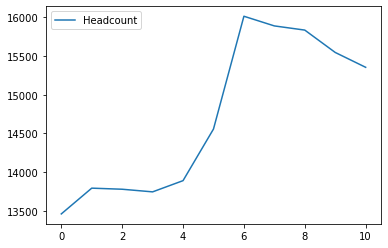

In [295]:
group_by_sex_year_index_reseted[group_by_sex_year_index_reseted.Sex=="F"].plot()

<AxesSubplot:>

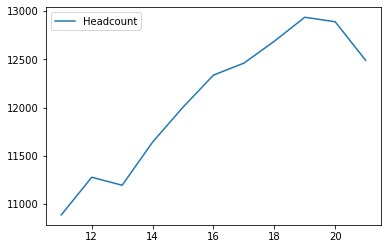

In [296]:
group_by_sex_year_index_reseted[group_by_sex_year_index_reseted.Sex=="M"].plot()

# Merging Data
- **Concatenation**: combining together Series, DataFrame
- **Joining**: join operations idiomatically very similar to relational databases like SQL

**Concatenation**:
```
df1 = pd.read_excel('./data/Students.xls', sheet_name=0)
df2 = pd.read_excel('./data/Students.xls', sheet_name=0)
concatencate1 = pd.concat([df1, df2])
concatencate1
concatencate2 = pd.concat([df1, df2], axis=1)
concatencate2
```


**Joining**:
```
left = pd.read_excel('./data/Students.xls', sheet_name=0)
right = pd.read_excel('./data/Students.xls', sheet_name=1)
joined = pd.merge(left, right, on='Academic year')
joined
```

In [60]:
df1 = pd.read_excel('./data/Students.xls', sheet_name=0)
df2 = pd.read_excel('./data/Students.xls', sheet_name=0)
concatencate1 = pd.concat([df1, df2])
concatencate1
concatencate2 = pd.concat([df1, df2], axis=1)
concatencate2

,Academic year,Associate Degree,Higher Diploma,Sub-degree,First year first degree,Top-up degree,Under-graduate,Academic year,Associate Degree,Higher Diploma,Sub-degree,First year first degree,Top-up degree,Under-graduate
0,2007/08,12029,9882,21911,2468,1731,4199,2007/08,12029,9882,21911,2468,1731,4199
1,2008/09,11238,9405,20643,3004,2095,5099,2008/09,11238,9405,20643,3004,2095,5099
2,2009/10,14177,10186,24363,2782,2680,5462,2009/10,14177,10186,24363,2782,2680,5462
3,2010/11,17646,10715,28361,3193,3334,6527,2010/11,17646,10715,28361,3193,3334,6527
4,2011/12,16018,9331,25349,3640,4081,7721,2011/12,16018,9331,25349,3640,4081,7721
5,2012/13,18131,13486,31617,6796,6082,12878,2012/13,18131,13486,31617,6796,6082,12878
6,2013/14,11715,9751,21466,6128,7349,13477,2013/14,11715,9751,21466,6128,7349,13477
7,2014/15,10275,9483,19758,7194,10488,17682,2014/15,10275,9483,19758,7194,10488,17682
8,2015/16,10942,8713,19655,6701,8736,15437,2015/16,10942,8713,19655,6701,8736,15437
9,2016/17,11127,7884,19011,6153,7635,13788,2016/17,11127,7884,19011,6153,7635,13788


In [61]:
left = pd.read_excel('./data/Students.xls', sheet_name=0)
right = pd.read_excel('./data/Students.xls', sheet_name=1)
joined = pd.merge(left, right, on='Academic year')
joined

,Academic year,Associate Degree_x,Higher Diploma_x,Sub-degree_x,First year first degree_x,Top-up degree_x,Under-graduate_x,Associate Degree_y,Higher Diploma_y,Sub-degree_y,First year first degree_y,Top-up degree_y,Under-graduate_y
0,2007/08,12029,9882,21911,2468,1731,4199,7159,6372,13531,1558,-,1558
1,2008/09,11238,9405,20643,3004,2095,5099,7211,7459,14670,2065,-,2065
2,2009/10,14177,10186,24363,2782,2680,5462,7303,8097,15400,2727,1499,4226
3,2010/11,17646,10715,28361,3193,3334,6527,8026,7167,15193,2921,2296,5217
4,2011/12,16018,9331,25349,3640,4081,7721,9468,7669,17137,2915,3003,5918
5,2012/13,18131,13486,31617,6796,6082,12878,10541,9271,19812,3040,4656,7696
6,2013/14,11715,9751,21466,6128,7349,13477,13035,13620,26655,3939,5767,9706
7,2014/15,10275,9483,19758,7194,10488,17682,9061,8387,17448,3286,7768,11054
8,2015/16,10942,8713,19655,6701,8736,15437,7962,7983,15945,5933,8279,14212
9,2016/17,11127,7884,19011,6153,7635,13788,8246,6986,15232,6060,7127,13187


# Matplotlib
Matplotlib is a low level graph plotting library in python that serves as a visualization utility.

**import before you use**:
```
import matplotlib.pyplot as plt
```

**Samples**:
```
df = pd.read_excel('./data/Students.xls', sheet_name=0)
year = df['Academic year']
ug = df['Under-graduate']
plt.plot(year, ug)
plt.plot(year, ug, 'o')
```

In [62]:
import matplotlib.pyplot as plt

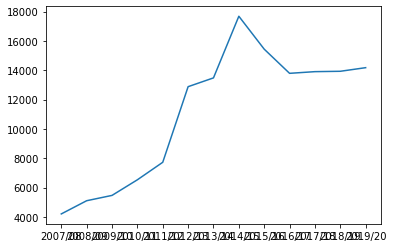

In [63]:
df = pd.read_excel('./data/Students.xls', sheet_name=0)
year = df['Academic year']
ug = df['Under-graduate']
plt.plot(year, ug)

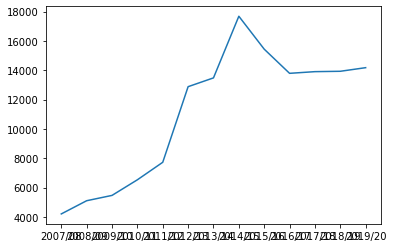

In [64]:
plt.plot(year, ug)

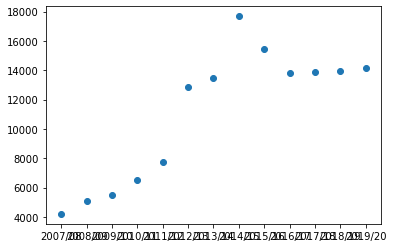

In [65]:
plt.plot(year, ug, 'o')

# Styling theMarkers

Other markers to consider:

`'o'`	Circle	
`'*'`	Star	
`'.'`	Point	
`','`	Pixel	
`'x'`	X	
`'X'`	X (filled)	
`'+'`	Plus	
`'P'`	Plus (filled)	
`'s'`	Square	
`'D'`	Diamond	
`'d'`	Diamond (thin)	
`'p'`	Pentagon	
`'H'`	Hexagon	
`'h'`	Hexagon	
`'v'`	Triangle Down	
`'^'`	Triangle Up	
`'<'`	Triangle Left	
`'>'`	Triangle Right	
`'1'`	Tri Down	
`'2'`	Tri Up	
`'3'`	Tri Left	
`'4'`	Tri Right	
`'|'`	Vline	
`'_'`	Hline

In [66]:
df['Academic year']

0     2007/08
1     2008/09
2     2009/10
3     2010/11
4     2011/12
5     2012/13
6     2013/14
7     2014/15
8     2015/16
9     2016/17
10    2017/18
11    2018/19
12    2019/20
Name: Academic year, dtype: object

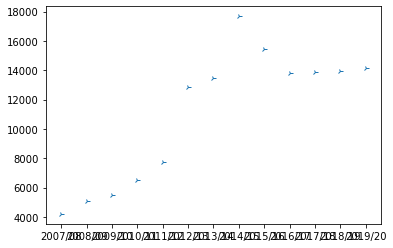

In [67]:
plt.plot(year, ug, '4')

# Configuring marker size
You can use the keyword argument markersize or the shorter version, ms to set the size of the markers:
Example:
```
plt.plot(year, ug, 'D', ms=10)
```

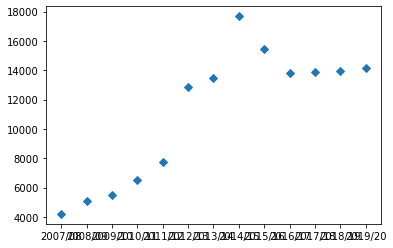

In [68]:
plt.plot(year, ug, 'D', ms=5)

# Seaborn